In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np

In [2]:
# #read the sdf file of 10 predictable molecules
# ligands_996 =Chem.SDMolSupplier('ndonor.sdf')
# #create the ecfp fingerprint
# #x is the input, 2 is the radius
# morgan_996=[AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=1024) for x in ligands_996]
# efp_996=np.array(morgan_996)
# efp_996.shape

In [3]:
# # #save the ecfp in a csv file
# pd.DataFrame(efp_996).to_csv('ecfp_10.csv')

In [4]:
# #define a function for normalizing in vertical order
# def col_normalize(X):
#     X1=np.matrix(X)
#     X_1=X1.transpose()
#     X_2=np.array(X_1)
#     X_3=preprocessing.normalize(X_2,norm="l2")
#     X_4=np.matrix(X_3)
#     X_5=X_4.transpose()
#     X_6=np.array(X_5)
#     return X_6

In [7]:
#read the file containing the ecfp and isomer(1 or 2) and normalize
input=pd.read_csv('input_996.csv')#Put address
efp_996=pd.read_csv('ecfp_996.csv')
efp_996=np.array(efp_996)
# Charge=input[['Charge_acid']].copy()
Isomer=input[['Isomer']].copy()
# X_996=np.concatenate((efp_996,Charge),axis=1)
X_996=np.concatenate((efp_996,Isomer),axis=1)
print(len(efp_996))
#Isomer_positive=input_positive[['Isomer']].copy()
#X_996=np.concatenate((efp_996,Isomer_positive),axis=1)
#X_785=col_normalize(X_785)
X_996.shape

996


(996, 1025)

In [8]:
#assign the Hammett constants to Y
Y_996=input[['Hammett Constant']].copy()
Y_996=np.array(Y_996)

In [10]:
efp_ndonor=pd.read_csv('ecfp_10.csv')
efp_ndonor=np.array(efp_ndonor)
X_ndonor=efp_ndonor
X_ndonor.shape

(10, 1025)

In [11]:
#create null list to record values later
MSE_boot=np.zeros((1000),dtype= float)
#Index= np.zeros((1000,662),dtype=int)
Y_prediction_train=np.zeros((996,1000),dtype=float)
#Y_prediction_test=np.zeros((334,1000),dtype=float)
Y_pred_all=np.zeros((996,1000),dtype=float)
Y_target_train=np.zeros((996,1000),dtype=float)
#Y_target_test=np.zeros((334,1000),dtype=float)
Y_prediction_ndonor=np.zeros((10,1000),dtype=float)
MSE_boot=np.zeros((1000),dtype= float)
print(Y_target_train[0].shape)

(1000,)


In [12]:
regr = RandomForestRegressor(n_estimators=1, max_depth=None, random_state=None,bootstrap=0)

In [13]:
# list(X_996).index("infinity")

In [14]:
for m in range(0,1000):
    #positive part
    index_996=np.random.choice(996, size=996, replace=1)
    X_train=X_996[index_996]
    Y_train=Y_996[index_996]
    X_test=np.delete(X_train,index_996,axis=0)
    Y_test=np.delete(Y_train,index_996,axis=0)
    #Y_positive_left.shape
    #negative part
#     index_negative=np.random.choice(183, size=183, replace=1)
#     X_121=X_183[index_negative]
#     Y_121=Y_negative[index_negative]
#     X_negative_left=np.delete(X_183,index_negative,axis=0)
#     Y_negative_left=np.delete(Y_negative,index_negative,axis=0)
#     #neutral part
#     index_zeros=np.random.choice(28, size=28, replace=1)
#     X_18=X_28[index_zeros]
#     Y_18=Y_zeros[index_zeros]
#     X_zeros_left=np.delete(X_28,index_zeros,axis=0)
#     Y_zeros_left=np.delete(Y_zeros,index_zeros,axis=0)
#     #target
#     X_662=np.concatenate((X_523,X_121,X_18),axis=0)
#     Y_662=np.concatenate((Y_523,Y_121,Y_18),axis=0)
#     X_662, Y_662 = shuffle(X_662, Y_662)
#     #X_662.shape
#     #print(Y_662.shape)
#     #left
#     X_left=np.concatenate((X_positive_left,X_negative_left,X_zeros_left),axis=0)
#     Y_left=np.concatenate((Y_positive_left,Y_negative_left,Y_zeros_left),axis=0)
#     Y_target_train[:,m]=Y_662.ravel()
#     #Y_target_test[:,m]=Y_left.ravel()
#     #Y_left.shape
#     #RF
    X_resample= X_train
    Y_resample= Y_train
    regr.fit(X_resample, Y_resample.ravel())
    Y_pred_train=regr.predict(X_resample)    #Fit RF on training set
    Y_pred_test=regr.predict(X_test)        #Fit RF on testing set
    Y_pred_all_each=regr.predict(X_996)     # Fit RF on complete database
    Y_pred_all[:,m]=Y_pred_all_each
    #Y_prediction_test[:,m]=Y_pred_left
    Y_prediction_train[:,m]=Y_pred_train
    #Y_pred_all=regr.predict(X_996)
    Y_pred_ndonor=regr.predict(X_ndonor)    # Fit RF on ndonor
    Y_prediction_ndonor[:,m]=Y_pred_ndonor
    MSE_train=mean_squared_error(Y_resample, Y_pred_train)
    MSE_test=mean_squared_error(Y_test, Y_pred_test)
    MSE_boot[m]=(MSE_train*0.368)+(0.632)*(MSE_test)

In [15]:
Y_prediction_mean=Y_pred_all.mean(axis=1)
Y_prediction_mean

array([ 2.84850000e-01,  2.58925000e-02,  8.11000000e-02, -3.84820000e-01,
       -3.75820000e-01,  3.70960000e-01,  4.62420000e-01,  3.05240000e-01,
        2.27790000e-01,  5.13480000e-01,  5.56160000e-01,  6.79740000e-01,
        7.27530000e-01,  3.20270000e-01,  3.48240000e-01,  2.70200000e-01,
        2.70020000e-01,  4.39670000e-01,  5.16620000e-01,  1.84800000e-01,
        1.12030000e-01,  3.92420000e-01,  4.20080000e-01,  4.03710000e-01,
        5.07950000e-01,  4.51480000e-01,  4.93580000e-01,  4.54790000e-01,
        5.13270000e-01,  3.21710000e-01,  3.62343333e-01,  4.40140000e-01,
        5.20220000e-01,  7.11900000e-02,  1.64500000e-02,  1.21500000e-01,
        1.24000000e-01, -6.29100000e-02, -9.26100000e-02, -5.83300000e-02,
       -1.19940000e-01, -5.80000000e-02,  2.08290000e-01, -1.26250000e-01,
        1.25160000e-01,  1.25970000e-01,  1.50330000e-01,  1.48700000e-01,
        3.24500000e-02, -9.11800000e-02,  1.26890000e-01,  1.22090000e-01,
        9.85200000e-02,  

In [16]:
Y_prediction_std=Y_pred_all.std(axis=1)
Y_prediction_std

array([0.02112765, 0.07980279, 0.06953409, 0.21778606, 0.20448796,
       0.07968236, 0.08649476, 0.13482412, 0.1053063 , 0.13694922,
       0.16799183, 0.1611041 , 0.18039567, 0.07664873, 0.10251977,
       0.08349347, 0.09415838, 0.06350741, 0.05872117, 0.1228762 ,
       0.1483913 , 0.07178261, 0.09743507, 0.05263398, 0.04979857,
       0.02080408, 0.02300399, 0.04036033, 0.0235076 , 0.06566259,
       0.09755231, 0.04988768, 0.05466765, 0.11673767, 0.11704742,
       0.04938168, 0.07250379, 0.11434523, 0.10528764, 0.04902766,
       0.05570814, 0.06209187, 0.12181123, 0.07077173, 0.07137489,
       0.09523161, 0.06819378, 0.08996949, 0.08394818, 0.10185385,
       0.05191944, 0.06323553, 0.04085107, 0.07339695, 0.07153249,
       0.08569613, 0.1643226 , 0.16442883, 0.07822924, 0.08794883,
       0.04087417, 0.04592524, 0.06401362, 0.07742027, 0.09666757,
       0.11976861, 0.07197422, 0.08941021, 0.13267626, 0.08846862,
       0.11284634, 0.0755017 , 0.0943334 , 0.02925499, 0.05746

In [17]:
sigma1=Y_prediction_std*2.03/(1000**0.5)
#sigma1.min()

In [18]:
MSE_all=mean_squared_error(Y_prediction_mean,Y_996)
MSE_all

0.0031369688512795976

In [30]:
#n_donor with NH2
Y_ndonor_mean=Y_prediction_ndonor.mean(axis=1)
print("       NOC,      NC,      N,       NCF3,      NNO2")
Y_ndonor_mean

       NOC,      NC,      N,       NCF3,      NNO2


array([0.01168, 0.01384, 0.04342, 0.52076, 0.41075, 0.38784, 0.45409,
       0.46624, 0.43806, 0.37408])

In [20]:
Y_ndonor_std=Y_prediction_ndonor.std(axis=1)
Y_ndonor_std

array([0.10543423, 0.09270952, 0.0632685 , 0.05535   , 0.18539239,
       0.21298811, 0.14762714, 0.12340041, 0.22664871, 0.17997098])

In [31]:
ndonor=np.zeros((2,10),dtype=float)
ndonor[0]=Y_ndonor_mean
ndonor[1]=Y_ndonor_std
# ndonor=np.concatenate((Y_ndonor_mean,Y_ndonor_std),axis=1)
pd.DataFrame(ndonor.T).to_csv('ndonor_ms.csv')#Put address
ndonor.T

array([[0.01168   , 0.10543423],
       [0.01384   , 0.09270952],
       [0.04342   , 0.0632685 ],
       [0.52076   , 0.05535   ],
       [0.41075   , 0.18539239],
       [0.38784   , 0.21298811],
       [0.45409   , 0.14762714],
       [0.46624   , 0.12340041],
       [0.43806   , 0.22664871],
       [0.37408   , 0.17997098]])

In [21]:
sigma2=Y_ndonor_std*2.03/(1000**0.5)
sigma2

array([0.00676827, 0.00595142, 0.00406147, 0.00355315, 0.01190112,
       0.01367261, 0.00947681, 0.0079216 , 0.01454954, 0.0115531 ])

In [22]:
pd.DataFrame(Y_prediction_mean).to_csv('Y_prediction_mean.csv')#Put address

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 35}

matplotlib.rc('font', **font)
# filename = 'Y_all.csv'
# df = pd.read_csv(filename)
# #df1= pd.read_csv('FEC_10000.csv')
# df.columns#, df1.columns

#Plot parameters

xlow = -1.5
xhigh = 2.5


x=input['Hammett Constant']
y=Y_prediction_mean
y_err=[Y_prediction_std,Y_prediction_std]

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


Text(-1.4, 1.9, 'Test set: 992 data points')

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


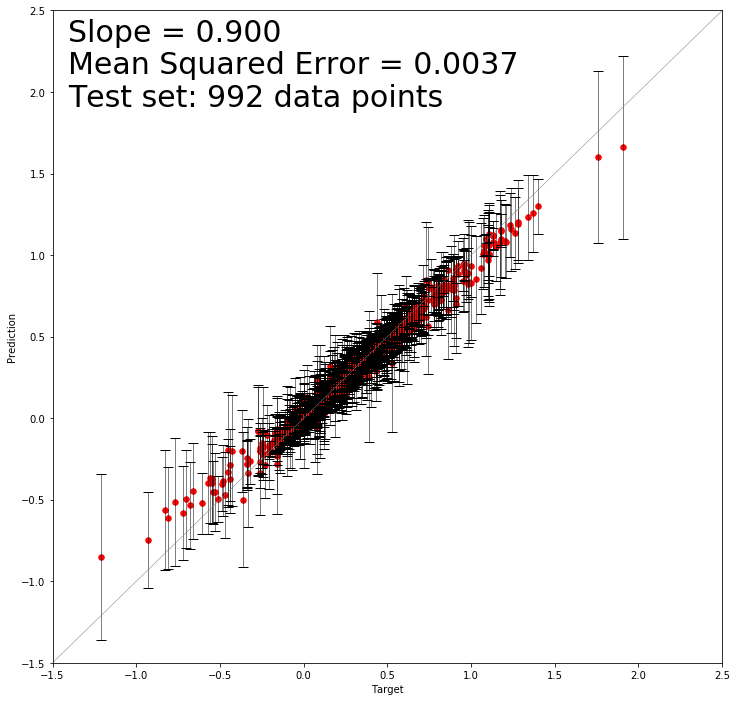

In [24]:
def scatplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots(figsize=(12,12))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.scatter(x_data, y_data, color = 'red',s=30)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data,  
                yerr = error_data, 
                color = 'black', 
                ls = 'none', 
                lw = 0.5, capsize = 5)
    plt.xlim(xlow,xhigh)
    plt.ylim(xlow,xhigh)
    ax.plot([xlow, xhigh], [xlow, xhigh], color='gray', linestyle='-', linewidth=0.5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title,fontsize=22.5)
    

# Call the function to create plot
scatplot(x_data = x, 
         y_data = y,
         error_data = y_err,
         x_label = 'Target',
         y_label = 'Prediction',
         title = '')

plt.annotate('Slope = 0.900', 
             xy=(-1.4, 2.3),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Mean Squared Error = 0.0037', 
             xy=(-1.4, 2.1),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Test set: 992 data points', 
             xy=(-1.4, 1.9),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
        
#Plotting prediction for inputs without 
#plt.scatter(x1, y1, color = 'green',s=30)
#plt.errorbar(x1, y1,yerr = y1_err, color = 'k', ls = 'none', lw = 0.5, capsize = 5)
#plt.show()